## **Name - Yash Gupta**
***

###   **Title - Prediction using Supervised ML**

***
It is the task to  predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

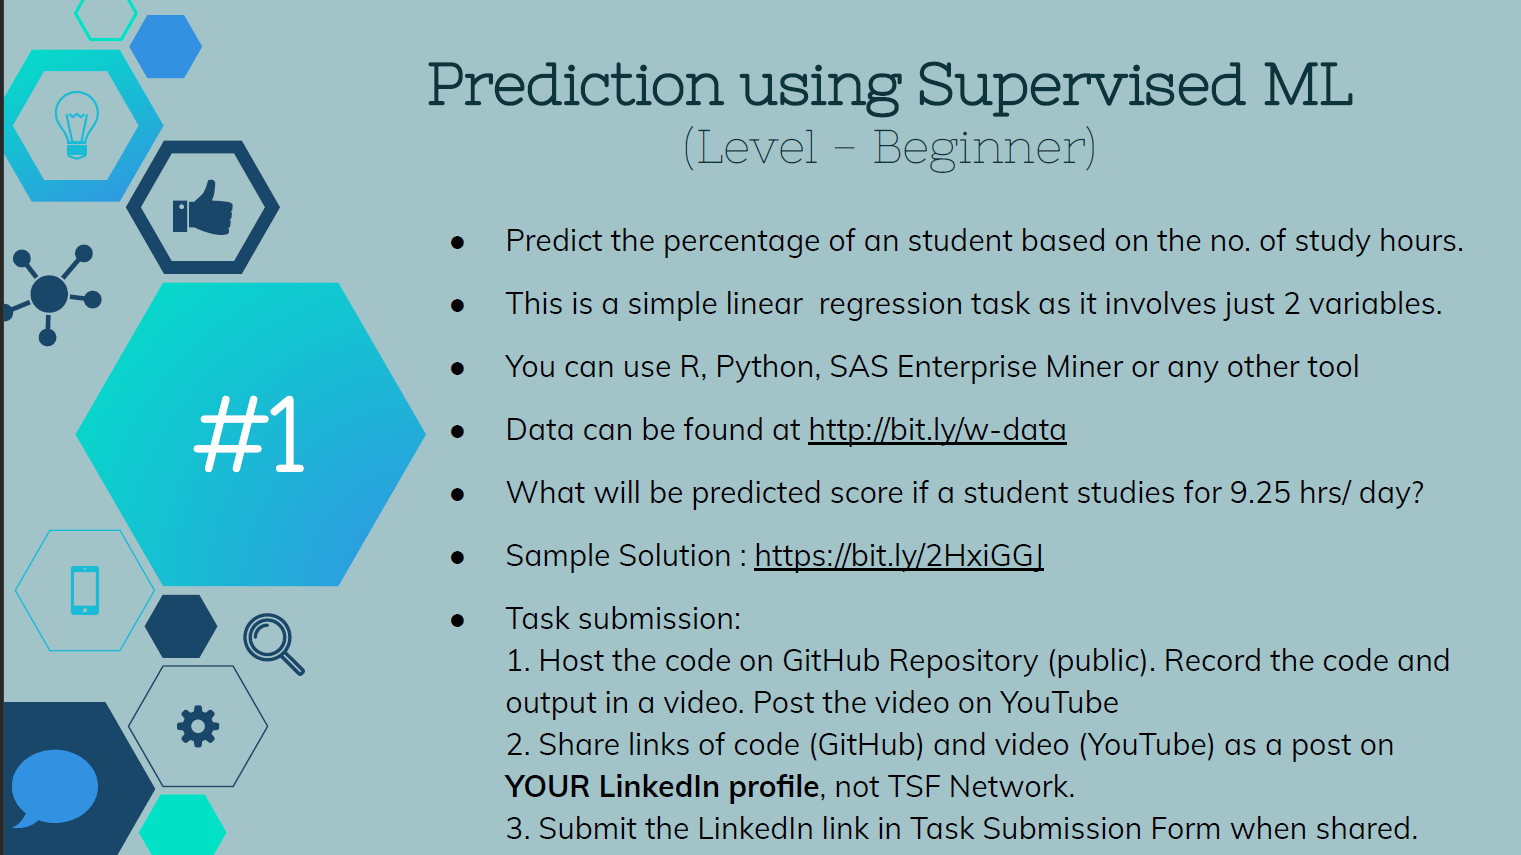





#### **Importing the required python libraries**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import  LinearRegression
%matplotlib inline

#### Importing dataset 

In [2]:
dataset = pd.read_csv('http://bit.ly/w-data')

#### Visualizing dataset

In [3]:
#First seven rows of dataset
dataset.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [4]:
#Checking the shape of dataset
print(dataset.shape)

#Checking datatype of features
dataset.info()

(25, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


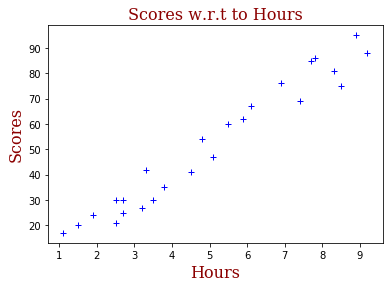

In [6]:
#managing font of xlabel,ylabel and title for different plots 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
    }

#Visualizing using plots
plt.plot(dataset['Hours'],dataset['Scores'],'b+')
plt.xlabel("Hours",fontdict=font)
plt.ylabel("Scores",fontdict=font)
plt.title("Scores w.r.t to Hours",fontdict=font)
plt.show()

 **Observation:**  From the above graph we can see a linear positive behaviour between scores and hours.

#### Getting dependent and independent variable
**X** - Independent {Hours}

**Y** - Depenedent {Scores}

In [7]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
#print(X,y)

#### Splitting data into train and test set

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Fitting training data into linear regression model 

In [9]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

##predicting using test set
predicted_y_test=regression_model.predict(X_test)

In [10]:
#checking difference between actual and predicted values in test set
dict_train=pd.DataFrame({"Actual Values":y_test,"Predicted_values":predicted_y_test})
dict_train

,Actual Values,Predicted_values
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


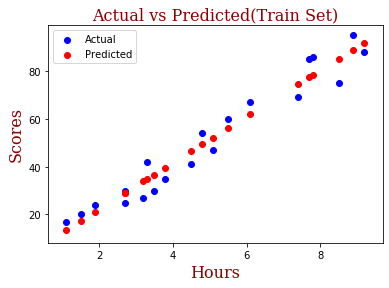

In [11]:
##Scatter plot between actual and predicted values in training data
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X_train, y_train,c='b', label='Actual')
ax1.scatter(X_train, regression_model.predict(X_train),c='r', label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Hours',fontdict=font)
plt.ylabel('Scores',fontdict=font)
plt.title("Actual vs Predicted(Train Set)",fontdict=font)
plt.show()

#### Plotting predicted line  

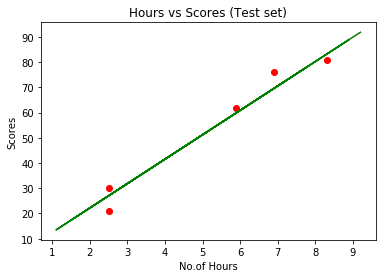

In [12]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regression_model.predict(X_train), color = "green")
plt.title("Hours vs Scores (Test set)",fontdict=font)
plt.xlabel("No.of Hours")
plt.ylabel("Scores")
plt.show()

#### Evaluating model 

In [13]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predicted_y_test))
print("Mean Squared Error: ", mean_squared_error(y_test, predicted_y_test))
print("Root Mean Squared Error: ", mean_squared_error(y_test, predicted_y_test)**0.5)
print("R2 Score: ", r2_score(y_test, predicted_y_test))


Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994


**What wil be the score of student if they study for 9.25 hrs?**

In [21]:
hours = [[9.25]]
print("{:.2f}".format(regression_model.predict(hours)[0]), "will be predicted score if a student studies for 9.25 hrs in a day.")

92.39 will be predicted score if a student studies for 9.25 hrs in a day.
